#### NMS 
1. NMS(Non Max Suppression)
    * Obect Detection 알고리즘은 Object가 있을 만한 위치에 많은 Detection을 수행하는 경향이 강하다. 
    * NMS는 Detected된 Object의 bounding box 중에 비슷한 위치에 있는 box를 제거하고 가장 적합한 box를 선택하는 기법이다. 
    
2. NMS logic 
    * Detected 된 bounding box 별로 특징 Confidence threshold 이하 bounding box는 먼저 제거(confidence score < 0.5) 
    * 가장 높은 Confidence score를 가진 box와 겹치는 다른 box를 모두 조사하여 IOU가 특정 threshold 이상인 box를 모두 제거 
    * **Confidence socre가 높을 수록, IOU Threshold 가 낮을 수록 box가 제거**
    

#### MAP
1. MAP(Mean Average Precision)
    * 실제 Object가 Detected된 재현율(Recall)과 변화에 따른 정밀도(Presion)의 값을 평균한 수치 
    * Precision Recall Curve , Average Precision

2. Precision, Recall
    * Precision과 Recall은 주로 Binary Classification에서 사용되는 지표이다. 
    1. Precision 
        * Precision은 예측을 True(Positive)한 대상 중에 실제 값이 True(Positive)로 일치한 데이터의 비율을 의미한다.
        * Object detection에서는 검출 알고리즘이 검출 예측한 결과가 실제 Object와 얼마나 일치하는지를 나타내는 지표이다. 
    2. Recall 
        * Recall은 실제 값이 Positive 인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율을 의미한다.
        * Sensitivility 
        * Object detection에서는 검출 알고리즘이 실제 Object들을 얼마나 정확하게 검출을 예측하는지를 나타내는 지표이다. 

3. IOU값에 따라서 Detection 예측 성공 결정 
    * Object detection에서 개별 Object에 대한 검출 예측이 성공하였는지의 여부를 IOU로 결정한다. 
$$\frac{\text{Area of Overlap}}{\text{Area of Union}} $$





#### Confusion Matrix
1. Confusion Matrix (오차 행렬)  
    * Confusion Matrix는 binary classification 예측 오류가 얼마인지와 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다. 
    
    
2. Object detection에서 TN, TP, FP, FN, 
    * TP : True Positive
        - (Ground Truth(bird) == Candidate(bird)) 
    * TN : True Negative 
    * FP : False Positive
        - (Ground Truth(cat) == Candidate(bird))
        - (Ground Truth(bird) == Candidate(bird)) IOU < 0.5 
        - No overlap 
    * FN : False Negative
        - No Prediction  
$$Precision = \frac{TP} {(FP + TP)} $$
$$Recall = \frac{TP}{(FN + TP)}$$
    * Precision이 좋아지기 위해서는 FP가 작아야 한다. 
    * Recall 이 좋아 지기 위해서는 FN이 작아야 한다. 

3. 업무에 따른 Precision 과 Recall의 상대적 중요도  
    * Recall이 상대적으로 더 중요한 지표인 경우 
        - 실제 Positive 데이터를 Negative 로 잘못 예측하여 업무상의 큰 영향이 발생하는 경우 
        - 암 진단, 금융사기 
    * Precision이 상대적으로 더 중요한 지표인 경우 
        - 실제 Negative 데이터를 Positive로 잘못 예측하여 업무상의 큰 영향이 발생하는 경우 
        - 스팸 

4. Confidence 임계값에 따른 Precision과 Recall의 변화 
    * Confidence 임계값이 낮을 수록 더 많은 예측 box를 만들게 되어 Precision는 낮아지고 Recall은 높아진다. 
    * Confidence 임계값이 높을 수록 예측 box를 만드는데 매우 신중하게 되어 Precision는 높아지고 Recall은 낮아진다. 
    * Confidence의 임계값에 따라서 정밀도와 재현율의 값이 변화된다. 

5. Precision/Recall Trade off 
    1. Presion Recall Trade off 
    * Confidence 임계값을 조정하면 Precision 또는 Recall의 수치를 높일 수 있다. 
    * 하지만 Precision와 Recall은 상호 보완적인 평가 지표이기 때문에 한 쪽이 높이면 한쪽이 떨어지기 쉽다. 이를 Precision/Recall Trade off의 Trade off라고 한다. 
    2. Precision Recall Curve 
    * Recall 값의 변화에 따른 Confidence 값을 조정하면서 얻어진 Precision 값을 나타낸 곡선을 Precision-Recall Curve 라고 한다. 
    * 이렇게 얻어진 Precision 값의 평균을 AP라고 하며 일반적으로 Precision Recall Curve의 면전 값으로 계산된다. 



#### Confusion Matrix  
1. Confusion Matrix Example
   * 유통기한이 지난 햄버거를 유통기한이 지난 햄버거로 분류한 것 : TP 
   * 정상 햄버거를 정상 햄버거로 분류한 것 : TN 
   * 유통기한이 지난 햄버거를 정산 햄버거로 잘못 분류한 경우 : FN 
   * 정상 햄버거를 유통 기한이 지난 햄버거로 잘못 분류한 경우 : FP 

|A|  | 예측 정답| 예측 정답 |  
|--|--|--|--|
|Model A|  | 유통기한이 지난 햄버거| 정상햄버거 |  
|실제정답| 유통기한이 지난 햄버거| 30 | 10 |   
|실제정답| 정상 햄버거| 30 | 30|   

$$Accuracy = \frac{60(30+30)}{100(30 + 10 +30+30)} =\text{60%}$$
$$Precision = \frac{(30)}{60(30 +30)} =\text{50%}$$
$$Recall = \frac{(30)}{40(30 +10)} =\text{75%}$$


|B|  | 예측 정답| 예측 정답 |  
|--|--|--|--|
|Model A|  | 유통기한이 지난 햄버거| 정상햄버거 |  
|실제정답| 유통기한이 지난 햄버거| 30 | 30 |   
|실제정답| 정상 햄버거| 10 | 30|   

$$Accuracy = \frac{60(30+30)}{100(30 + 10 +30+30)} =\text{60%}$$
$$Precision = \frac{(30)}{40(30 +10)} =\text{75%}$$
$$Recall = \frac{(30)}{60(30 +30)} =\text{50%}$$


In [ ]:
!pip install selectivesearch

In [ ]:
import os 
import cv2 
import numpy as np 
import selectivesearch 
import matplotlib.pyplot as plt 


In [ ]:
from google.colab import drive 

In [ ]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
FILE_PATH = "drive/MyDrive/dataset/image/"
image = cv2.cvtColor(cv2.imread(FILE_PATH + "audrey01.jpg"), cv2.COLOR_BGR2RGB)

In [ ]:
def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape : {images[i].shape}")

def get_show_image(images):
    plt.figure(figsize=(12, 12))
    plt.axis("on")
    plt.imshow(image)
    plt.show()

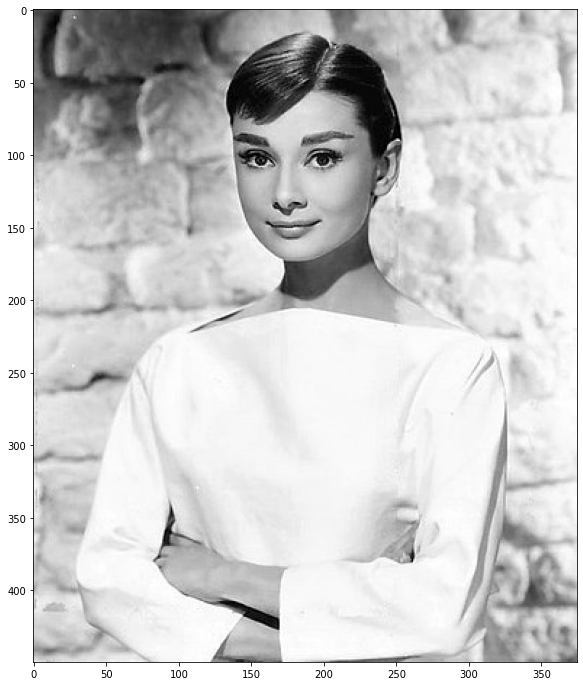

shape : (450, 375, 3)


In [ ]:
get_show_image(image)
get_show_shape([image])